In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from CD_control_optimization.tf_quantum import *
device_lib.list_local_devices()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11038129118864123764, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15435671125421237648
 physical_device_desc: "device: XLA_CPU device"]

In [108]:
#first, the optimization options.
N = 60 #hilbert space size
fock = 4 #desired fock
params = {
'optimization_type':'calculation',
'N_cav':N
}
opt = BatchOptimizer(**params)

In [109]:
xvec = np.linspace(-5,5,201)
betas_real, betas_imag = np.meshgrid(xvec, xvec)
betas = betas_real + 1j*betas_imag
psi = qt.basis(N,3)

In [110]:
C = opt.characteristic_function(psi=psi, betas=betas)

ipykernel_launcher:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


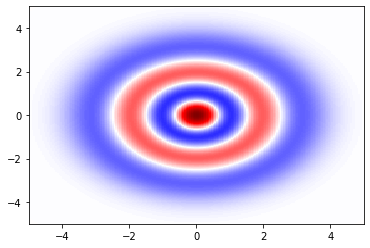

In [111]:
plt.pcolormesh(xvec, xvec, np.real(C), vmin=-1, vmax=+1, cmap='seismic')

In [30]:
betas_tf = tf.constant([betas])

In [32]:
betas_tf.shape[1]

41